# Filtration

Filtrace obrazu slouží ke zvýraznění určité informace. Můžeme potlačit šum, vyhladit obraz, zvýraznit kontrast, nebo detekovat hrany. Předzpracování obrazu pomocí filtrace je lokální nikoli bodová operace. Pracujeme s intenzitou bodu, který je vázán na své okolí. Toto okolí může mít různé tvary, nejčasteji se jedná o čtvercové okolí. Filtry dělíme na lineární a nelineární. Lineární filtry jsou takové, které hodnotu výsledného bodu počítají jako sumu součinu intenzit s příslušnými váhami filtru v daném okolí bodu.
Oproti tomu nelineární filtry nevytvářejí novou intenzitu, ale výslednou intenzitu vybírají z okolí upravovaného bodu. Filtr typu medián vybere prostřední člen z uspořádané posloupnosti v daném okolí.

## Filtration with more images

![avg0](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/1.jpg)
![avg0](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/2.jpg)


Výsledek po průměrování
![avg](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/vys.jpg)

## Local averaging - convolution

In [2]:
%pylab inline --no-import-all
import numpy as np
import scipy
from scipy import ndimage
import scipy.signal
import scipy.misc
import skimage.data
import skimage.io
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


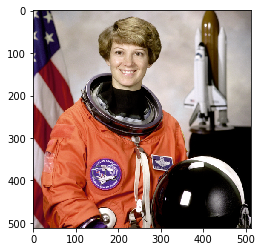

In [4]:
# plt.imshow(scipy.misc.lena())
plt.imshow(skimage.data.astronaut())

In [3]:
np.convolve([3, 10, 10, 1, 2, 2], [1, -2, 1])

array([ 3,  4, -7, -9, 10, -1, -2,  2])

[konvoluce v 1D](http://www.jhu.edu/~signals/convolve/index.html)

![konvoluce 2d](http://upload.wikimedia.org/wikipedia/commons/c/c5/Konvoluce_2rozm_diskretni.jpg)

### Averaging - rovoměrné rozmazání

![convolution](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Convolucion_de_entrada_con_respuesta_al_impulso.gif/220px-Convolucion_de_entrada_con_respuesta_al_impulso.gif)

In [8]:
np.convolve([10, 10, 10, 10, 10, 10, 10, 10], [1, -2, 1], "valid")

array([0, 0, 0, 0, 0, 0])

In [9]:
np.convolve([10, 10, 10, 10, 10, 0, 0, 0, 0, 0], [1, -2, 1], "valid")

array([  0,   0,   0, -10,  10,   0,   0,   0])

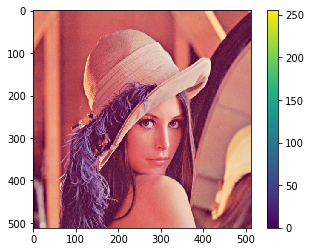

In [33]:
lena = skimage.io.imread("https://i.stack.imgur.com/3T6Gc.jpg")
plt.imshow(lena)
plt.colorbar()

0.20064397202412135


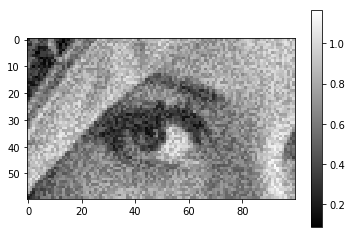

In [26]:
# lena = scipy.misc.face()
# l = lena[250:340, 530:630,0]
lena = skimage.io.imread("https://i.stack.imgur.com/3T6Gc.jpg", as_grey=True)
# print(lena.max())

l = lena[230:290, 220:320]
noisy = l + 1.6*l.std()*np.random.random(l.shape)

print(noisy.std())

plt.imshow(noisy, cmap='gray', interpolation=None)
#plt.imshow(lena)
plt.colorbar()
plt.show()


### Rozsah

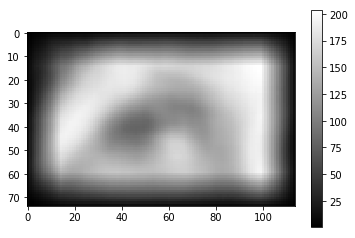

In [27]:
import scipy.signal
kernel = np.ones([15,15])
output1 = scipy.signal.convolve2d(noisy, kernel)

plt.imshow(output1, cmap="gray")
plt.colorbar()

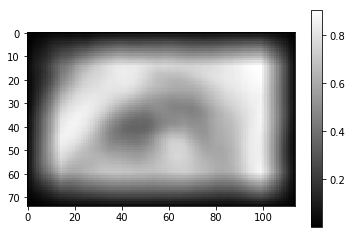

In [28]:
kernel = np.ones([15,15])
kernel = kernel / np.sum(kernel)
output1 = scipy.signal.convolve2d(noisy, kernel)

plt.imshow(output1, cmap="gray")
plt.colorbar()

### Okraje

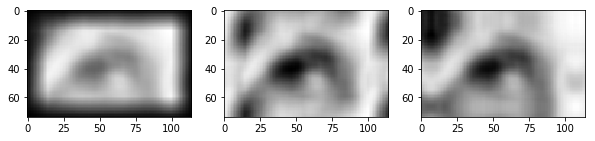

In [29]:
import scipy.signal
kernel = np.ones([15,15])
output1 = scipy.signal.convolve2d(noisy, kernel, boundary="fill", fillvalue=0)
output2 = scipy.signal.convolve2d(noisy, kernel, boundary="wrap")
output3 = scipy.signal.convolve2d(noisy, kernel, boundary="symm")
plt.figure(figsize=[10,15])
plt.subplot(131)
plt.imshow(output1, cmap="gray")
plt.subplot(132)
plt.imshow(output2, cmap="gray")
plt.subplot(133)
plt.imshow(output3, cmap="gray")

### Rozměr konvoluce

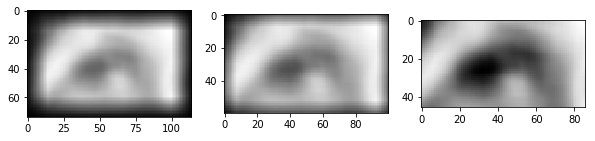

In [30]:
import scipy.signal
kernel = np.ones([15,15])
output1 = scipy.signal.convolve2d(noisy, kernel, mode="full", boundary="fill")
output2 = scipy.signal.convolve2d(noisy, kernel, mode="same", boundary="fill")
output3 = scipy.signal.convolve2d(noisy, kernel, mode="valid", boundary="fill")
plt.figure(figsize=[10,15])
plt.subplot(131)
plt.imshow(output1, cmap="gray")
plt.subplot(132)
plt.imshow(output2, cmap="gray")
plt.subplot(133)
plt.imshow(output3, cmap="gray")

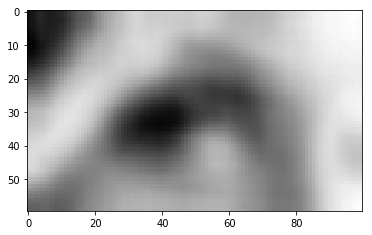

In [31]:
local_mean = ndimage.uniform_filter(noisy, size=15)
plt.imshow(local_mean, cmap='gray', interpolation=None)
plt.show()

### Gaussian filter

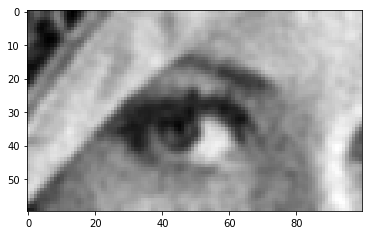

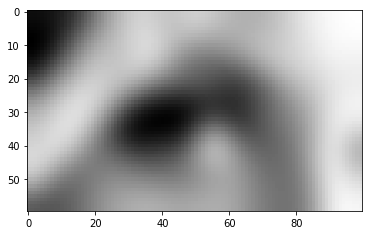

In [32]:
blurred_lena = ndimage.gaussian_filter(noisy, sigma=1)
very_blurred = ndimage.gaussian_filter(noisy, sigma=5)
plt.imshow(blurred_lena, cmap='gray')
plt.figure()
plt.imshow(very_blurred, cmap='gray')

### Remove noise

Zašumněný obraz odstranění šumu

![mince](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/sumpc.jpg)
![mince](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/sumprc.jpg)

![mince](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/sump.jpg)
![mince](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/sumpr.jpg)

### Quantiles (median)

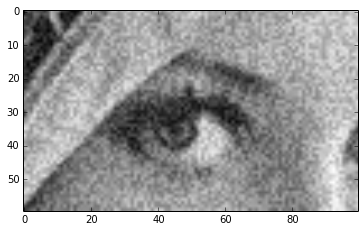

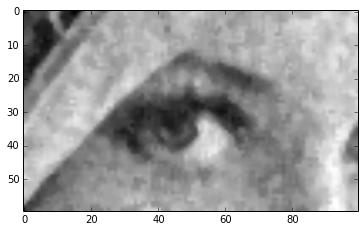

In [26]:
med_denoised = ndimage.median_filter(noisy, 3)
plt.imshow(noisy, cmap='gray')
plt.show()
plt.figure()
plt.imshow(med_denoised, cmap='gray')
plt.show()

### Další filtry

Další kvantilové filtry

ndimage.maximum_filter, ndimage.percentile_filter

Nelineární filtry

scipy.signal.wiener

## Gradient filters

In [8]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt

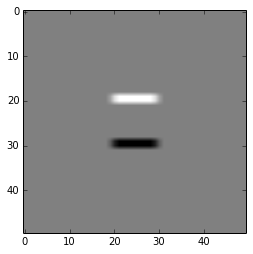

In [27]:
img = np.zeros([50, 50])
img[20:30,20:30] = 50

plt.imshow(img, cmap='gray')

sob = scipy.ndimage.filters.sobel(img, 0)
plt.imshow(sob, cmap='gray')

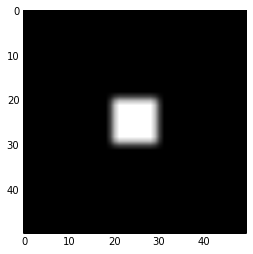

In [10]:
img = np.zeros([50,50,50])
img[20:30,20:30,20:30] = 50

plt.imshow(img[:,:,20], cmap='gray')

sob = scipy.ndimage.filters.sobel(img,2)
plt.imshow(sob[:,:,20], cmap='gray')

### Roberts

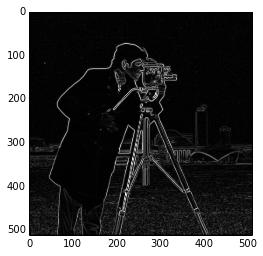

In [11]:
import matplotlib.pyplot as plt

import  skimage.data
import  skimage.filter 
# import roberts, sobel


image = skimage.data.camera()
edge_roberts = skimage.filter.roberts(image)

plt.imshow(edge_roberts, cmap='gray')

### Sobel

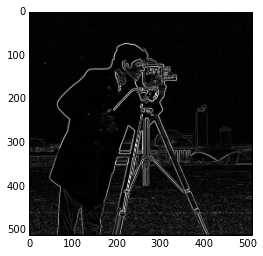

In [12]:
edg_sobel = skimage.filter.sobel(image)

plt.imshow(edg_sobel, cmap='gray')

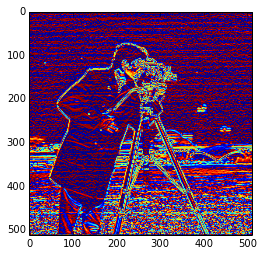

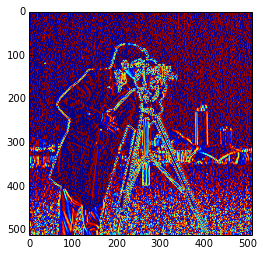

In [13]:
import pylab as pl
sx=ndimage.sobel(image,axis=0,mode='constant')
sy=ndimage.sobel(image,axis=1,mode='constant')
# sob=np.hypot(sx,sy)
# pl.quiver(sx, sy)
plt.imshow(sx)
plt.figure()
plt.imshow(sy)

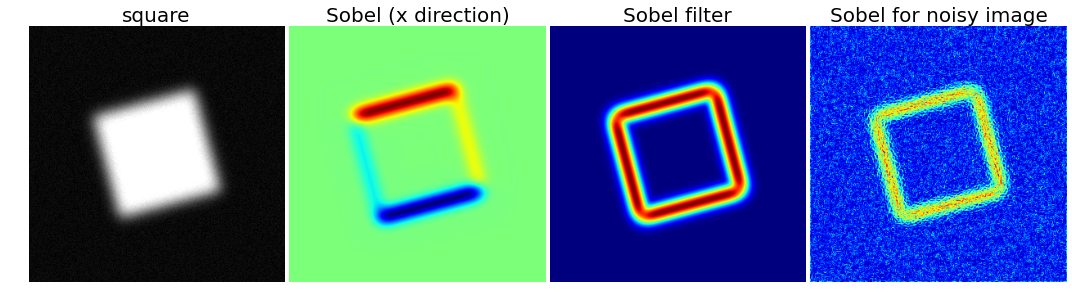

In [14]:
from scipy import ndimage
import matplotlib.pyplot as plt

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im += 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

### Canny

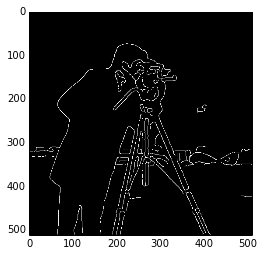

In [15]:
edges2 = skimage.filter.canny(image, sigma=3)
plt.imshow(edges2, cmap='gray')

## Další využití filtrace

Odstranění vlivu nerovnoměrného osvětlen. Tuto operaci lze provádět pouze pro případy, kdy pozadí zabírá velkou část obrazu a je možné odstranit objekty pomocí filtrace. Příklad:

![model pozadi](http://www.kky.zcu.cz/uploads/courses/zdo/lesson3/osvetleni.jpg)
                
                
vlevo nahoře – šedotónový obraz se světelným přechodem, vpravo nahoře naprahovaný obraz pomocí prahu 150 (struktura není znatelná na celém obraze), vlevo dole – původní obraz po odstranění objektů, vpravo dole – výsledek prahování po odstranění vlivu pozadí (odečtení od původního obrazu)

### Úkol

Zobrazte hranový obraz bez teček

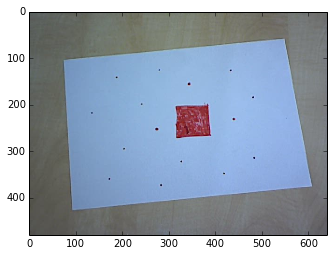

In [30]:
import cv2

import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.misc
import urllib
import cStringIO

import matplotlib.pyplot as plt

import scipy.ndimage
from scipy import ndimage
import skimage
import skimage.io

# scipy.misc.imread(
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
img = skimage.io.imread(URL)

plt.imshow(img)

# Příprava na test

V testu očekávejte otázky typu: Co je to hrana? Jaké typy nelinearni filtrace znáte? Nakreslete transformační funkci pro zesvětlení obrazu apod.

## Úkoly

1) definujte co je to hrana v obraze

2) vyzkoušejte jak funguje třetí parametr (práh) u funkce edge

3) naprogramujte výpočet diferencí v ose x a y z daného šedotónového obrazu, z těchto hodnot vypočítejte velikost hrany a její směr pro každý bod obrazu, zobrazte velikost hran pomocí imshow, proveďte naprahování velikostí hran na nějakou hodnotu (stejny vysledek jako edge), vykreslete si velikost a směr hran pomocí funkce quiver (dx(diference v x),dy(diference v y))

4) vyzkoušejte odstranění vlivu osvětlení na obraze mince.jpg, (nejprve je nutné do obrazu osvětlení přidat)


### Úkoly na cvičení

* Spočítat objekty v obraze
* Spočítat velké objekty v obraze, je-li přidán šum v podobě malých útržků papíru